# STA 208: Homework 4


### Exercise 3 (Kernel density estimation) (From Hw # 3)


The data set ``n90_pol.csv`` contains information on 90 British university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views.

The variables ``amygdala`` and ``acc`` indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar anatomical variables. The variable ``orientation`` gives the subjects’ locations on a five-point scale from 1 (very conservative) to 5 (very liberal). orientation is an ordinal but not a metric variable, so scores of 1 and 2 are not necessarily as far apart as scores of 2 and 3.

1. Estimate the probability density for the volume of the amygdala. Plot it and report the bandwidth. Repeat this for the volume of the ACC.
2. Estimate a joint probability density for the volumes of the amygdala and the ACC. What are the bandwidths? Are they the same as the bandwidths you got in problem 1? Should they be?
3. Plot the joint density. Does it suggest the two volumes are statistically independent? Should they be? You may use three dimensions, color, contours, etc., for your plot, but you will be graded, in part, on how easy to read it is. (Hint: Remember that the random variables $X$ and $Y$ are statistically independent when their joint pdf is the product of their marginal pdfs, $p(x, y) = p(x)p(y)$. Think about what the product of your estimated pdfs from question 1 would look like.

In [123]:
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde #gaussian kernel KDE
from statsmodels.nonparametric.kernel_density import KDEMultivariate 
from matplotlib import style
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
style.use('seaborn-dark-palette')

#import data
df = pd.read_csv("n90_pol.csv")
df.head()

,subject,amygdala,acc,orientation
0,1,0.0051,-0.0286,2
1,2,-0.0674,0.0007,3
2,3,-0.0257,-0.0110,3
3,4,0.0504,-0.0167,2
4,5,0.0125,-0.0005,5


**Solution 1.**

bandwidth for amygdala    0.013196
dtype: float64


/var/folders/zd/drh5nccn0bq4w08_z0z0lzkr0000gn/T/ipykernel_73947/2196226210.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_axis,vals, 'k', color = "black")


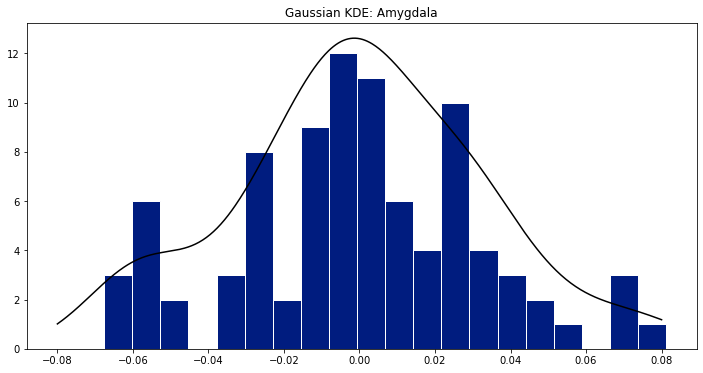

In [124]:
#using scipy instead: first for amygdala


scipy_kernel = gaussian_kde(df['amygdala'])

#generate x axis values for the kernel density
x_axis = np.linspace(-.08,.08,500)
vals = scipy_kernel.evaluate(x_axis)

#use matplotlib to plot the histogram, then superimpose the density I estimated
plt.figure(figsize = (12,6))
counts, bins, patches = plt.hist(df['amygdala'],bins = 20, edgecolor = 'white')
plt.plot(x_axis,vals, 'k', color = "black")
plt.title("Gaussian KDE: Amygdala")
print('bandwidth for {}'.format(round(scipy_kernel.factor,3)*np.std(df[['amygdala']])))


bandwidth for acc    0.008271
dtype: float64:


/var/folders/zd/drh5nccn0bq4w08_z0z0lzkr0000gn/T/ipykernel_73947/1012777127.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_axis,vals, 'k', color = "black")


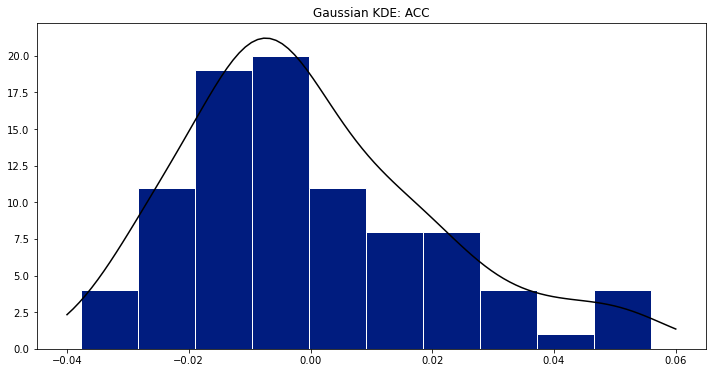

In [125]:
# now for ACC
scipy_kernel_acc = gaussian_kde(df['acc'])

#generate x axis values for the kernel density
x_axis = np.linspace(-.04,.06,100)
vals = scipy_kernel_acc.evaluate(x_axis)

#use matplotlib to plot the histogram, then superimpose the density I estimated
plt.figure(figsize = (12,6))
counts, bins, patches = plt.hist(df['acc'],bins = 10, edgecolor = 'white')
plt.plot(x_axis,vals, 'k', color = "black")
plt.title("Gaussian KDE: ACC")
print('bandwidth for {}:'.format(round(scipy_kernel_acc.factor,3)*np.std(df[['acc']])))

**Solution 2.**

In [126]:
joint_variables = df[["amygdala", "acc"]].T #needs to be transposed to work with gaussian_kde

#get the kernel density estimate 
kde_estimate = gaussian_kde(joint_variables)


In [127]:
#estimate the joint kernel density
gaussian_kde_joint = gaussian_kde(joint_variables)


dens_u = KDEMultivariate(data=df[["amygdala", "acc"]], var_type='cc', bw='normal_reference')
print("The bandwidths are:  {:.3f} and {:.3f}".format(dens_u.bw[0], dens_u.bw[1]))


The bandwidths are:  0.016 and 0.010


Clearly, these are not the same bandwidths that were produced in the first part. Nor should they be!

**Solution 3.**

In [128]:
density = gaussian_kde_joint.evaluate(joint_variables)

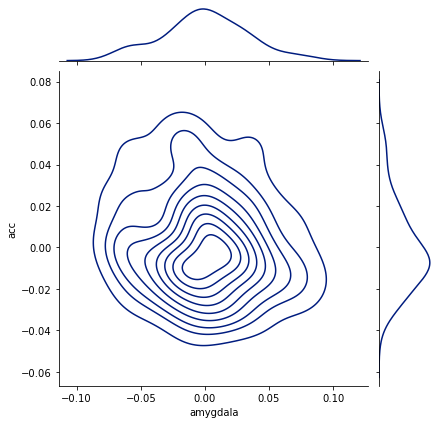

In [129]:
sns.jointplot(data = df[["amygdala", "acc"]], x = 'amygdala', y = 'acc',kind = 'kde')

No they do not appear to be statistically independent. The plot clearly is angled towards the left, and is not smooth and symmetrical (the contours follow different patterns depending on the location in the plot).

<Figure size 720x576 with 0 Axes>

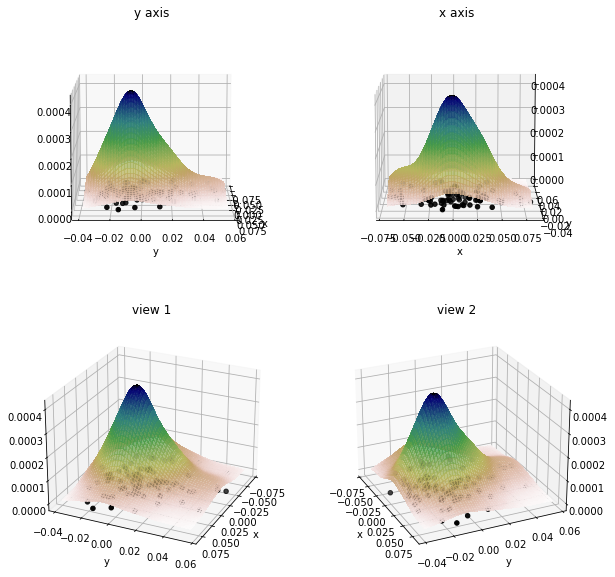

In [130]:
 # Create a mesh of 200 y-points
fig = plt.figure(figsize=(10, 8))

acc = np.array(df['acc'])
amygdala = np.array(df['amygdala'])


kde_x = gaussian_kde(amygdala)
kde_x_space = np.linspace(df['amygdala'].min(), df['amygdala'].max(), 100)
kde_x_eval = kde_x.evaluate(kde_x_space)
kde_x_eval /= kde_x_eval.sum()

kde_y = gaussian_kde(df['acc'])
kde_y_space = np.linspace(df['acc'].min(), df['acc'].max(), 100)
kde_y_eval = kde_y.evaluate(kde_y_space)
kde_y_eval /= kde_y_eval.sum()


# Grid of x and y
X, Y = np.meshgrid(kde_x_space, kde_y_space)
# Grid of probability density
kX, kY = np.meshgrid(kde_x_eval, kde_y_eval)
# Intersection
Z = kX * kY

fig, ax = plt.subplots(
    2, 2, 
    subplot_kw={"projection": "3d"}, 
    figsize=(10, 10))

for i, (elev, anim, title) in enumerate(zip([10, 10, 25, 25], 
                                            [0, -90, 25, -25],
                                            ['y axis', 'x axis', 'view 1', 'view 2']
                                            )):
    # Plot the surface.
    surf = ax.flat[i].plot_surface(X, Y, Z, cmap=plt.cm.gist_earth_r,
                           linewidth=0, antialiased=False, alpha=.75)
    ax.flat[i].scatter(df['amygdala'], df[['acc']], zs=0, zdir='z', c='k')
    ax.flat[i].set(
        xlabel='x', ylabel='y',
        title=title
    )
    ax.flat[i].view_init(elev=elev, azim=anim)
plt.show()

### Exercise (Gaussian process)

Generate $n = 200$ training data points $(x_1, y_1), \dots, (x_n, y_n)$ from the generative model:

$$
y_i = 0.2x_i \sin(x_i) + \varepsilon_i, \ \varepsilon_i \overset{i.i.d}{\sim} N(0, 0.5),
$$

where $i = 1, \dots, n$, the $x_i$’s are drawn from $\text{Unif}(-10, 10)$. In addition to this, generate $m = 100$ test data points, denoted by $x^\star_i$, $i = 1, \dots, m$, from $\text{Unif}(-15, 15)$ and compute the ground truth targets $f(x^\star_i) = 0.2 x_i^\star \sin(x^\star)$, $i = 1, \dots, m$.

Use the function ``gaussian_process.GaussianProcessRegressor`` in sklearn to fit Gaussian process regression to your data. 

1. Plot the ground truth $f(x^\star_i)$, $i = 1, \dots, m$, the predicted $\hat f(x_i)$, the error bars for the 95% posterior intervals from the GP regression on the _same_ plot. Be sure to clearly distinguish the true targets from the predicted $\hat f(x_i)$ and the 95% prediction intervals (e.g. using different colors and line styles), and include a legend with your plot.

2. What is the optimal value for the parameters in Q1 (use ``get_params`` to find out)? Instead of using the default optimizer, choose two quite different initial start values by yourself and refit the function. Print out the estimated values for the parameters as well as the value of the log-marginal likelihood. Call the two predicted functions $\hat f_1(x_i)$ and $\hat f_2(x_i)$. Plot them along with $f(x^\star_i)$ and their 95% prediction intervals in two separate plots. Compare them to the plot in Q1. Comment on what you found and whether the algorithm is sensitive to the choice of initial values. 

3. What is the default kernel used in the ``gaussian_process.GaussianProcessRegressor`` function? Replace the default kernel with the exponential sine squared kernel (aka periodic kernel). Re-do Q1, comparing the curve fitting with it in Q1. In this question, you can use the default optimizer.

In [131]:
#Generate Data
#first, training data

#set seed and get x's
np.random.seed(69)
X_train = np.random.uniform(low = -10, high = 10, size = 200)
X_test = np.random.uniform(low =-15, high = 15, size = 100)

#generate random noise
noise = np.random.normal(loc = 0, scale = np.sqrt(.5), size = 200)

#generative model
y_train = np.array(.2*X_train * np.sin(X_train) + noise).reshape(-1,1)

#ground truth targets (y test)
ground_truth_y = np.array(.2 * X_test * np.sin(X_test)).reshape(-1,1)


**Solution 1.**

In [132]:
from sklearn.gaussian_process import GaussianProcessRegressor
#fit the model 
gp_regression_model = GaussianProcessRegressor(alpha = 1, random_state=42).fit(X = X_train.reshape(-1,1), y = y_train)

#create arrangemenet of X values
X_values = np.linspace(start=-15, stop = 15, num = 10000).reshape(-1,1)

#generate predictions
predictions, std_devs = gp_regression_model.predict(X_values, return_std= True)

#get 95% posterior lines
upper_bound = predictions + 1.96*std_devs
lower_bound = predictions - 1.96*std_devs

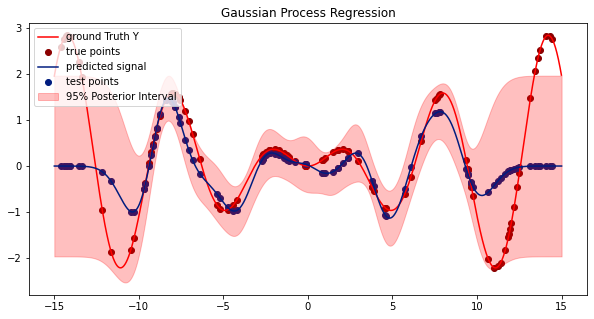

In [133]:

#get predictions from the test data
test_predictions, std_devs = gp_regression_model.predict(X_test.reshape(-1,1), return_std= True)

#make the plot
plt.figure(figsize = (10,5))

xvals = np.arange(-15,15,.01)
yvals = np.sin(xvals)*.2*xvals


#true signal
plt.plot(xvals, yvals, label = "ground Truth Y", c = "red" )

#plot points
plt.scatter(X_test,ground_truth_y, label =  "true points", c = 'darkred')

#plot predictions
plt.plot(X_values, predictions, label = "predicted signal")

plt.scatter(X_test, test_predictions, label = "test points")

# plt.plot(np.arange(0,len(X_values)), predictions, label = "prediction")
plt.fill_between(X_values.ravel(), lower_bound, upper_bound, color = 'red', alpha = .25, label = "95% Posterior Interval")
plt.title("Gaussian Process Regression")
plt.legend(loc="upper left")
plt.show()

**Solution 2.**

In [134]:
print(gp_regression_model.get_params())

{'alpha': 1, 'copy_X_train': True, 'kernel': None, 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 42}


In [135]:
print("log marginal likelihood for gaussian process from Q1: {}".format(gp_regression_model.log_marginal_likelihood_value_))


log marginal likelihood for gaussian process from Q1: -257.29756082568895


In [136]:
#fit f_1_hat
# choose a different optimizer
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

# kernel = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1, length_scale_bounds="fixed")

#change the constant value in the ConstantKernel and see what happens
kernel = ConstantKernel(constant_value = 500, constant_value_bounds=(1e-3, 1000)) * RBF(length_scale = .05, length_scale_bounds = (1e-5, 1000)) 
gp_f1 = GaussianProcessRegressor(kernel = kernel, alpha=1, n_restarts_optimizer= 15, random_state=42).fit(X = X_train.reshape(-1,1), y = y_train)
#generate predictions
predictions_f1, std_devs = gp_f1.predict(X_values.reshape(-1,1), return_std= True)

#get 95% posterior lines
upper_bound_f1 = predictions_f1 + 1.96*std_devs
lower_bound_f1 = predictions_f1 - 1.96*std_devs





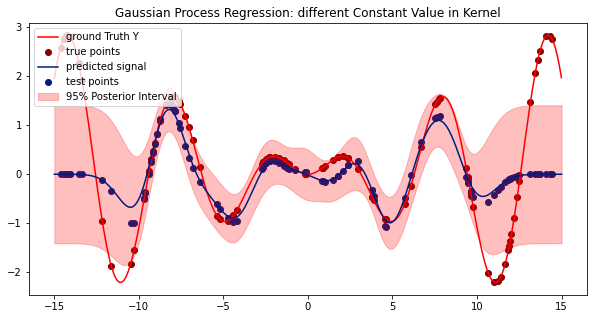

In [137]:
#make the plot
#get predictions from the test data
test_predictions_f1, std_devs = gp_regression_model.predict(X_test.reshape(-1,1), return_std= True)

#make the plot
plt.figure(figsize = (10,5))

xvals = np.arange(-15,15,.01)
yvals = np.sin(xvals)*.2*xvals


#true signal
plt.plot(xvals, yvals, label = "ground Truth Y", c = "red" )

#plot points
plt.scatter(X_test,ground_truth_y, label =  "true points", c = 'darkred')

#plot predictions
plt.plot(X_values, predictions_f1, label = "predicted signal")

plt.scatter(X_test, test_predictions_f1, label = "test points")

# plt.plot(np.arange(0,len(X_values)), predictions, label = "prediction")
plt.fill_between(X_values.ravel(), lower_bound_f1, upper_bound_f1, color = 'red', alpha = .25, label = "95% Posterior Interval")
plt.title("Gaussian Process Regression: different Constant Value in Kernel")
plt.legend(loc="upper left")
plt.show()

Here, for $f_1$ I have increased the `constant value` parameter, as well as widened both the `constant_value_bound` and `length_scale_bound` parameters in the kernel. This seems to have results in a plot that looks somewhat similar to that of the first Gaussian Process from part 1, with the one notable difference being that the posterior interval in $f_1$ appear to be narrower at the tail ends of the plot.

/Users/collinkennedy/miniforge3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/collinkennedy/miniforge3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


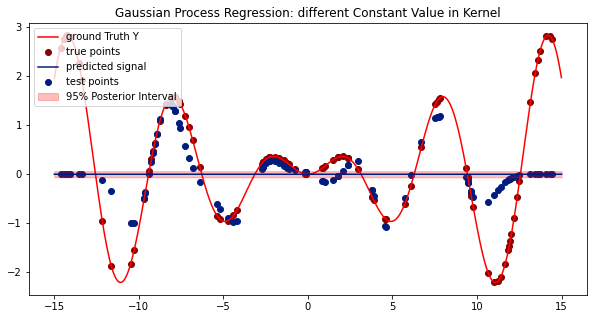

In [138]:
#fit f_2_hat
# choose a different optimizer
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

# kernel = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1, length_scale_bounds="fixed")

#change the constant value in the ConstantKernel and see what happens
kernel = ConstantKernel(constant_value = 1000, constant_value_bounds=(1e-3, 1)) * RBF(length_scale = .05, length_scale_bounds = (1e-5, 1)) 
gp_f2 = GaussianProcessRegressor(kernel = kernel, alpha=50, n_restarts_optimizer= 15, random_state=42).fit(X = X_train.reshape(-1,1), y = y_train)
#generate predictions
predictions_f2, std_devs = gp_f2.predict(X_values.reshape(-1,1), return_std= True)

#get 95% posterior lines
upper_bound_f2 = predictions_f2 + 1.96*std_devs
lower_bound_f2 = predictions_f2 - 1.96*std_devs

test_predictions_f2, std_devs = gp_regression_model.predict(X_test.reshape(-1,1), return_std= True)

#make the plot
plt.figure(figsize = (10,5))

xvals = np.arange(-15,15,.01)
yvals = np.sin(xvals)*.2*xvals


#true signal
plt.plot(xvals, yvals, label = "ground Truth Y", c = "red" )

#plot points
plt.scatter(X_test,ground_truth_y, label =  "true points", c = 'darkred')

#plot predictions
plt.plot(X_values, predictions_f2, label = "predicted signal")

plt.scatter(X_test, test_predictions_f2, label = "test points")

# plt.plot(np.arange(0,len(X_values)), predictions, label = "prediction")
plt.fill_between(X_values.ravel(), lower_bound_f2, upper_bound_f2, color = 'red', alpha = .25, label = "95% Posterior Interval")
plt.title("Gaussian Process Regression: different Constant Value in Kernel")
plt.legend(loc="upper left")
plt.show()

Here for $f_2$, all I do is change the value of `alpha` to $50$ in the call to `GaussianProcessRegressor()`. This appears to result in the algorithm being unable to converge, as I get a `ConvergenceWarning`.

**Solution 3.**

The default Kernel that is passed is `ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")`. 


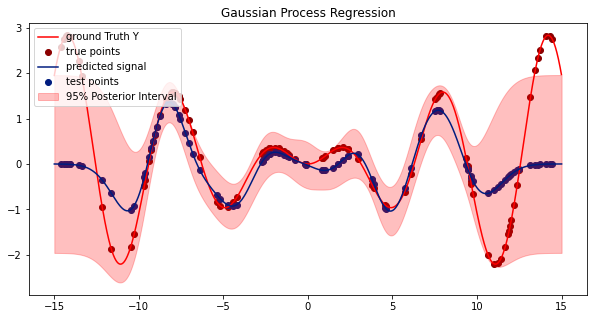

In [139]:
from sklearn.gaussian_process.kernels import ExpSineSquared

#refit but with ExpSineSquared Kernel
gp_regression_model = GaussianProcessRegressor(kernel = ExpSineSquared(periodicity=20),alpha = 1, random_state=42).fit(X = X_train.reshape(-1,1), y = y_train)

#create arrangemenet of X values
X_values = np.linspace(start=-15, stop = 15, num = 10000).reshape(-1,1)

#generate predictions
predictions, std_devs = gp_regression_model.predict(X_values, return_std= True)

#get 95% posterior lines
upper_bound = predictions + 1.96*std_devs
lower_bound = predictions - 1.96*std_devs

#get predictions from the test data
test_predictions, std_devs = gp_regression_model.predict(X_test.reshape(-1,1), return_std= True)

#make the plot
plt.figure(figsize = (10,5))

xvals = np.arange(-15,15,.01)
yvals = np.sin(xvals)*.2*xvals


#true signal
plt.plot(xvals, yvals, label = "ground Truth Y", c = "red" )

#plot points
plt.scatter(X_test,ground_truth_y, label =  "true points", c = 'darkred')

#plot predictions
plt.plot(X_values, predictions, label = "predicted signal")

plt.scatter(X_test, test_predictions, label = "test points")

# plt.plot(np.arange(0,len(X_values)), predictions, label = "prediction")
plt.fill_between(X_values.ravel(), lower_bound, upper_bound, color = 'red', alpha = .25, label = "95% Posterior Interval")
plt.title("Gaussian Process Regression")
plt.legend(loc="upper left")
plt.show()


Using the `ExpSineSquared` Kernel, it is possible to obtain a plot that looks very similar to that of part 1. This of course depends on the value passed to the `periodicity` parameter in the `ExpSineSquared` Kernel. Here, I have set `periodicity = 20`, and the posterior interval are very similar to the posterior interval in part 1.